In [3]:
import workflow as wf
import pandas as pd
import tensorflow as tf

ModuleNotFoundError: No module named 'pydot'

In [ ]:
path = "REGISTRO  FERNANDO PARA IA.xls"

In [2]:
datos_raw = wf.load_and_clean(path)

In [3]:
datos_chi = wf.chi_squared_test(datos_raw, 'EXITUS30D')

In [4]:
datos_chi.shape

(372, 30)

In [5]:
datos_chi['EXITUS30D'].value_counts()

no    337
si     29
Name: EXITUS30D, dtype: int64

In [6]:
datos_imputed = wf.most_frequent_and_knn_imputation(datos_chi)

In [7]:
datos_std = wf.min_max_normalization(datos_imputed)

In [8]:
data1 = datos_std.drop(columns = ['EXITUS30D'])

In [9]:
data_enc = wf.ordinal_encoding(data1)

In [10]:
x_train, x_test, y_train, y_test, network_output = wf.prep_datos_red('EXITUS30D' , datos_std, data_enc)

(297, 29) (75, 29)
(297, 1) (75, 1)


In [ ]:
best_params = wf.grid_search_mlp(x_train, y_train, x_test, y_test)

In [12]:
best_params = {'batch_size': 16, 'dropout_rate': 0.15, 'epochs': 50, 'neurons': 12}

In [13]:
best_params

{'batch_size': 16, 'dropout_rate': 0.15, 'epochs': 50, 'neurons': 12}

In [14]:
tf.keras.backend.clear_session()

In [15]:
best_model = wf.create_sequential_model(shape=x_train.shape[1], dropout_rate=best_params['dropout_rate'], neurons=best_params['neurons'])

Train on 237 samples, validate on 60 samples
Epoch 1/50
237/237 - 1s - loss: 1.3393 - acc: 0.2405 - val_loss: 0.8199 - val_acc: 0.2833
Epoch 2/50
237/237 - 0s - loss: 0.8350 - acc: 0.5190 - val_loss: 0.4517 - val_acc: 0.9333
Epoch 3/50
237/237 - 0s - loss: 0.5314 - acc: 0.7595 - val_loss: 0.3221 - val_acc: 0.9333
Epoch 4/50
237/237 - 0s - loss: 0.3953 - acc: 0.8523 - val_loss: 0.2721 - val_acc: 0.9333
Epoch 5/50
237/237 - 0s - loss: 0.3946 - acc: 0.8692 - val_loss: 0.2537 - val_acc: 0.9333
Epoch 00005: early stopping
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                360       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156   

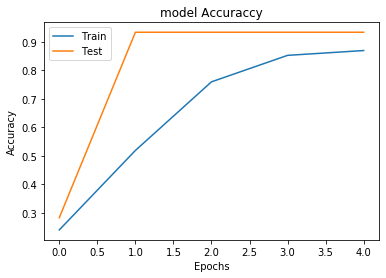

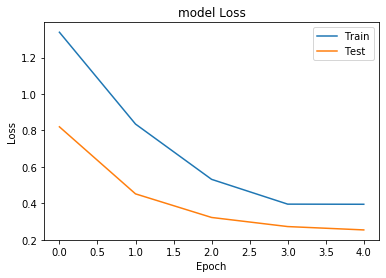

In [16]:
best_model_train = wf.train_model(best_model, best_params, x_train, y_train)



Classification Report

              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000         6
           1    0.92000   1.00000   0.95833        69

    accuracy                        0.92000        75
   macro avg    0.46000   0.50000   0.47917        75
weighted avg    0.84640   0.92000   0.88167        75



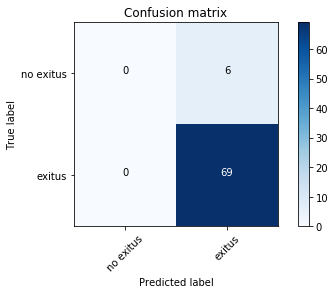

In [17]:
predicts = wf.predict_model_and_report(best_model_train, x_test, y_test, ['no exitus', 'exitus'])